In [4]:
import pandas as pd
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from collections import Counter

In [5]:
df = pd.read_csv("Comments.csv")
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,date,userid,message
0,"September 24, 2001 6:58PM",willow25,"I'm buying a ""new"" car by the end of the year ..."
1,"October 4, 2001 6:09AM",dindak,Buy a 2001/ 2002 Oldsmobile Intrigue. It's one...
2,"October 4, 2001 7:45AM",peteri1,Am looking at 1 of 4 choices to replace my 99G...
3,"October 4, 2001 8:15AM",mrdetailer,Generally a 3-4 year old car range is a good o...
4,"October 4, 2001 8:38AM",dindak,Maxima and Intrigue are both excellent choices...
...,...,...,...
4095,"April 26, 2020 12:01PM",backy,"Vl1969 said:\nHello, I am planning to upgrade ..."
4096,"May 1, 2020 7:15PM",mcdawgg,backy said:\nshow previous quotes\n\n\n\n\n\n\...
4097,"May 3, 2020 12:23PM",backy,mcdawgg said:\nshow previous quotes\n\n\n\n\n\...
4098,"May 12, 2020 12:47PM",co1212,Looking to either lease a new midsize luxury S...


In [7]:
stop = stopwords.words('english')
words = df['message'].map(lambda x: word_tokenize(str(x).lower()))
clean = words.apply(lambda x: [item for item in x if item not in stop])
clean = clean.apply(lambda x: [item for item in x if len(item) > 2])
clean = clean.apply(lambda x: [item for item in x if "'" not in item])
clean = clean.apply(lambda x: [item for item in x if "-" not in item])
clean = clean.apply(lambda x: [item for item in x if "..." not in item])
clean = clean.apply(lambda x: [item for item in x if "car" not in item])
clean = clean.apply(lambda x: [item for item in x if "would" not in item])

# creates a list of lists that only include a word once for a given message (reduces artificial inflation)
filtered = []
for i in range(len(clean)):
    filtered.append(list(dict.fromkeys(clean[i])))
this = pd.Series(filtered)
this

0       [buying, new, end, year, first, choice, nissan...
1       [buy, 2001/, 2002, oldsmobile, intrigue, one, ...
2       [looking, choices, replace, 99gs400, read, eve...
3       [generally, year, old, range, good, one, basic...
4       [maxima, intrigue, excellent, choices, midsize...
                              ...                        
4095    [vl1969, said, hello, planning, upgrade, fall,...
4096    [backy, said, show, previous, quotes, case, kn...
4097    [mcdawgg, said, show, previous, quotes, compar...
4098    [looking, either, lease, new, midsize, luxury,...
4099    [help, like, lease, new, suv, minivan, must, 3...
Length: 4100, dtype: object

In [4]:
models = pd.read_csv('models.csv', header = None)
models = models.rename(columns = {0:'Brand',1:'Model'})
models[:10]
models['Models']=models.groupby('Brand')['Model'].transform(lambda x : ' '.join(x))
models

,Brand,Model,Models
0,acura,integra,integra legend vigor rlx ilx mdx rdx tsx rsx
1,acura,legend,integra legend vigor rlx ilx mdx rdx tsx rsx
2,acura,vigor,integra legend vigor rlx ilx mdx rdx tsx rsx
3,acura,rlx,integra legend vigor rlx ilx mdx rdx tsx rsx
4,acura,ilx,integra legend vigor rlx ilx mdx rdx tsx rsx
...,...,...,...
510,volvo,xc90,xc60 xc70 xc90 s60 s80 v60 c70
511,volvo,s60,xc60 xc70 xc90 s60 s80 v60 c70
512,volvo,s80,xc60 xc70 xc90 s60 s80 v60 c70
513,volvo,v60,xc60 xc70 xc90 s60 s80 v60 c70


In [5]:
acuramodels=models['Models'][0].split()
audimodels=models['Models'][9].split()
bmwmodels=models['Models'][19].split()
buickmodels=models['Models'][41].split()
cadillacmodels=models['Models'][49].split()
chevroletmodels=models['Models'][52].split()
chryslermodels=models['Models'][115].split()
dodgemodels=models['Models'][124].split()
fordmodels=models['Models'][136].split()
hondamodels=models['Models'][160].split()
hyundaimodels=models['Models'][206].split()
infinitimodels=models['Models'][245].split()
kiamodels=models['Models'][255].split()
lincolnmodels=models['Models'][263].split()
mazdamodels=models['Models'][271].split()
mercedesmodels=models['Models'][301].split()
mercurymodels=models['Models'][308].split()
mitsubishimodels=models['Models'][310].split()
nissanmodels=models['Models'][312].split()
pontiacmodels=models['Models'][330].split()
saturnmodels=models['Models'][348].split()
subarumodels=models['Models'][351].split()
suzukimodels=models['Models'][372].split()
toyotamodels=models['Models'][401].split()
volkswagenmodels=models['Models'][499].split()
volvomodels=models['Models'][512].split()

In [6]:
#REPLACING ALL THE MODELS WITH THEIR CORRESPONDING BRAND
for i in range(len(this)):
   for j in range(len(this[i])):
       if this[i][j] in acuramodels:
           this[i][j] = 'acura'
       elif this[i][j] in nissanmodels:
           this[i][j] = 'nissan'
       elif this[i][j] in audimodels:
           this[i][j] = 'audi'
       elif this[i][j] in bmwmodels:
           this[i][j] = 'bmw'
       elif this[i][j] in buickmodels:
           this[i][j] = 'buick'
       elif this[i][j] in cadillacmodels:
           this[i][j] = 'cadillac'
       elif this[i][j] in chevroletmodels:
           this[i][j] = 'chevrolet'
       elif this[i][j] in chryslermodels:
           this[i][j] = 'chrysler'
       elif this[i][j] in dodgemodels:
           this[i][j] = 'dodge'
       elif this[i][j] in fordmodels:
           this[i][j] = 'ford'
       elif this[i][j] in hondamodels:
           this[i][j] = 'honda'
       elif this[i][j] in hyundaimodels:
           this[i][j] = 'hyundai'
       elif this[i][j] in infinitimodels:
           this[i][j] = 'infiniti'
       elif this[i][j] in kiamodels:
           this[i][j] = 'kia'
       elif this[i][j] in lincolnmodels:
           this[i][j] = 'lincoln'
       elif this[i][j] in mazdamodels:
           this[i][j] = 'mazda'
       elif this[i][j] in mercurymodels:
           this[i][j] = 'mercury'
       elif this[i][j] in mitsubishimodels:
           this[i][j] = 'mitsubishi'
       elif this[i][j] in nissanmodels:
           this[i][j] = 'nissan'
       elif this[i][j] in pontiacmodels:
           this[i][j] = 'pontiac'
       elif this[i][j] in subarumodels:
           this[i][j] = 'subaru'
       elif this[i][j] in suzukimodels:
           this[i][j] = 'suzuki'
       elif this[i][j] in toyotamodels:
           this[i][j] = 'toyota'
       elif this[i][j] in volkswagenmodels:
           this[i][j] = 'volkswagen'
       elif this[i][j] in volvomodels:
           this[i][j] = 'volvo'
       else:
           pass
this

0       [buying, new, end, year, first, choice, nissan...
1       [buy, 2001/, 2002, oldsmobile, intrigue, one, ...
2       [looking, choices, replace, 99gs400, read, eve...
3       [generally, year, old, range, good, one, basic...
4       [nissan, intrigue, excellent, choices, midsize...
                              ...                        
4095    [vl1969, said, hello, planning, upgrade, fall,...
4096    [backy, said, show, previous, quotes, case, kn...
4097    [mcdawgg, said, show, previous, quotes, compar...
4098    [looking, either, lease, new, midsize, luxury,...
4099    [help, like, lease, new, suv, minivan, must, 3...
Length: 4100, dtype: object

In [7]:
# coverting attributes
for i in range(len(this)):
    for j in range(len(this[i])):
        if this[i][j] == "old":
            this[i][j] = 'age'
        elif this[i][j] == 'new':
            this[i][j] = 'age'
        elif this[i][j] == 'money':
            this[i][j] = 'price'
        elif this[i][j] == 'miles':
            this[i][j] = 'mileage'
        else:
            pass   
this        

0       [buying, age, end, year, first, choice, nissan...
1       [buy, 2001/, 2002, oldsmobile, intrigue, one, ...
2       [looking, choices, replace, 99gs400, read, eve...
3       [generally, year, age, range, good, one, basic...
4       [nissan, intrigue, excellent, choices, midsize...
                              ...                        
4095    [vl1969, said, hello, planning, upgrade, fall,...
4096    [backy, said, show, previous, quotes, case, kn...
4097    [mcdawgg, said, show, previous, quotes, compar...
4098    [looking, either, lease, age, midsize, luxury,...
4099    [help, like, lease, age, suv, minivan, must, 3...
Length: 4100, dtype: object

In [8]:
#replacing aspiration words with aspiration
aspirations = ['buy', 'buying', 'get', 'getting', 'want', 'value', 'love']
for i in range(len(this)):
    for j in range(len(this[i])):
        if this[i][j] in aspirations:
            this[i][j] = 'aspiration'
        else:
            pass   
this        

0       [aspiration, age, end, year, first, choice, ni...
1       [aspiration, 2001/, 2002, oldsmobile, intrigue...
2       [looking, choices, replace, 99gs400, read, eve...
3       [generally, year, age, range, good, one, basic...
4       [nissan, intrigue, excellent, choices, midsize...
                              ...                        
4095    [vl1969, said, hello, planning, upgrade, fall,...
4096    [backy, said, show, previous, quotes, case, kn...
4097    [mcdawgg, said, show, previous, quotes, compar...
4098    [looking, either, lease, age, midsize, luxury,...
4099    [help, like, lease, age, suv, minivan, must, 3...
Length: 4100, dtype: object

In [9]:
count = this.map(lambda x: Counter(x))
messages = count
messages

0       {'aspiration': 2, 'age': 2, 'end': 1, 'year': ...
1       {'aspiration': 1, '2001/': 1, '2002': 1, 'olds...
2       {'looking': 1, 'choices': 1, 'replace': 1, '99...
3       {'generally': 1, 'year': 1, 'age': 1, 'range':...
4       {'nissan': 1, 'intrigue': 1, 'excellent': 1, '...
                              ...                        
4095    {'vl1969': 1, 'said': 1, 'hello': 1, 'planning...
4096    {'backy': 1, 'said': 1, 'show': 1, 'previous':...
4097    {'mcdawgg': 1, 'said': 1, 'show': 1, 'previous...
4098    {'looking': 1, 'either': 1, 'lease': 1, 'age':...
4099    {'help': 1, 'like': 1, 'lease': 1, 'age': 1, '...
Length: 4100, dtype: object

In [10]:
count = this.map(lambda x: Counter(x))
final = count[0]
for i in range(1,len(count)):
    final += count[i]
frequencydf = pd.DataFrame.from_dict(final,orient='index').reset_index()
frequencydf = frequencydf.rename(columns = {'index':'Word', 0:'Count'})
frequencydf = frequencydf.sort_values(by = 'Count', ascending = False)
frequencydf[:50]
# count in this data frame is equal to the total number of posts that each word appeared in

,Word,Count
0,aspiration,3434
170,honda,1631
1,age,1478
171,toyota,1277
92,like,1199
28,one,1076
110,good,1062
193,price,1003
302,mileage,924
208,also,844


## TASK A

Under the markdown cell titled "Top 10 Brands", you will see the top 10 brands by frequency in a data frame. The frequency refers to the number of messages in the forumn that a brand appeared in. The top 10 brands by frequency are Honda, Toyota, Nissan, Hyundai, Chevrolet, Subaru, Ford, Mazda, Acura and Volkswagen. Honda and Toyota lapped the field, which makes sense, as both of them are known to be reliable, cost-efficient, and fuel efficient cars for the common man.

Under the markdown cell titled "Lift Matrix", you will lift values of brands with respect to one another in the form of a matrix. This represents associations between brands. 

Under the markdown cell titled "MDS Plot", the brands are shown on a multi-dimensional scaling plot. This illustrates association between brand mentions. 

#### Top 10 Brands

In [11]:
# top 10 brands by frequency 
brands = models['Brand'].unique().tolist()
top10 = frequencydf[frequencydf['Word'].isin(brands)][:10]
top10_list = top10['Word'].tolist()
top10

,Word,Count
170,honda,1631
171,toyota,1277
6,nissan,778
1079,hyundai,742
898,chevrolet,642
136,subaru,598
1630,ford,583
774,mazda,527
705,acura,450
260,volkswagen,399


#### Lift Calculations

In [12]:
# Lift (a,b) = [#(a,b) together] / [(#a)*(#b)]
def message_words(x):
    df2 = pd.DataFrame.from_dict(x, orient='index').reset_index().rename(columns = {'index':'Word', 0:'Count'})
    return df2['Word'].tolist()
that = messages.apply(message_words)
that            

0       [aspiration, age, end, year, first, choice, ni...
1       [aspiration, 2001/, 2002, oldsmobile, intrigue...
2       [looking, choices, replace, 99gs400, read, eve...
3       [generally, year, age, range, good, one, basic...
4       [nissan, intrigue, excellent, choices, midsize...
                              ...                        
4095    [vl1969, said, hello, planning, upgrade, fall,...
4096    [backy, said, show, previous, quotes, case, kn...
4097    [mcdawgg, said, show, previous, quotes, compar...
4098    [looking, either, lease, age, midsize, luxury,...
4099    [help, like, lease, age, suv, minivan, must, 3...
Length: 4100, dtype: object

In [13]:
#function for counting number of brands in a comment
def fun(x):
    counter = 0
    for i in range(len(x)):
        if x[i] in top10_list:
            counter = counter + 1
        else:
            counter = counter + 0
    return counter
#creating df with only brands
comentionstemp=that[that.map(fun)>=2]
comentionstemp.to_frame().reset_index().drop('index',axis=1)
comentions = comentionstemp.apply(lambda x: [item for item in x if item in top10_list])
comentions

8            [honda, toyota, nissan]
12              [subaru, volkswagen]
18      [toyota, volkswagen, subaru]
19              [toyota, volkswagen]
32                   [subaru, acura]
                    ...             
4093                 [toyota, mazda]
4094         [subaru, toyota, honda]
4095                [subaru, toyota]
4096                 [toyota, honda]
4097         [honda, subaru, toyota]
Length: 1449, dtype: object

In [14]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 

 
# Create one list using many lists
data = list(itertools.chain.from_iterable(comentions))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
cooccurance_matrix = pd.DataFrame(data_matrix)
cooccurance_matrix

,acura,chevrolet,honda,nissan,ford,mazda,hyundai,volkswagen,toyota,subaru
acura,12.0,9.0,64.0,15.0,17.0,12.0,12.0,6.0,32.0,27.0
chevrolet,8.0,18.0,56.0,28.0,64.0,38.0,23.0,14.0,54.0,21.0
honda,66.0,71.0,58.0,111.0,59.0,93.0,84.0,40.0,188.0,52.0
nissan,23.0,34.0,95.0,25.0,23.0,24.0,49.0,28.0,81.0,26.0
ford,6.0,50.0,69.0,27.0,13.0,32.0,35.0,20.0,62.0,29.0
mazda,14.0,19.0,73.0,34.0,37.0,16.0,51.0,29.0,71.0,34.0
hyundai,10.0,18.0,91.0,44.0,35.0,37.0,30.0,18.0,90.0,37.0
volkswagen,8.0,15.0,53.0,27.0,17.0,27.0,24.0,9.0,29.0,31.0
toyota,40.0,70.0,209.0,72.0,55.0,57.0,63.0,41.0,56.0,59.0
subaru,19.0,20.0,55.0,25.0,23.0,42.0,39.0,35.0,58.0,11.0


In [15]:
brand_pairs = pd.read_csv("Brand Pairs Frequency Counts.csv", header = None).rename(columns = {0:'brand1', 1:'brand2',2:'Count'})
brand_pairs['Lift'] = brand_pairs['Count']
top10_dict = top10.set_index('Word').to_dict()['Count']
top10_dict

{'honda': 1631,
 'toyota': 1277,
 'nissan': 778,
 'hyundai': 742,
 'chevrolet': 642,
 'subaru': 598,
 'ford': 583,
 'mazda': 527,
 'acura': 450,
 'volkswagen': 399}

In [16]:
N = len(messages)
for i in range(len(brand_pairs)):
    c_b1 = top10_dict[brand_pairs['brand1'][i]]
    c_b2 = top10_dict[brand_pairs['brand2'][i]]
    brand_pairs['Lift'].iloc[i] = (N * brand_pairs['Count'][i]) / (c_b1 * c_b2)
x = brand_pairs
#x = x.sort_values(by = "Lift", ascending = False)
brand_pairs_copy = brand_pairs
brand_pairs_copy = brand_pairs_copy.rename(columns = {'brand2':'brand1', 'brand1':'brand2'}) 
brand_pairs_copy
y = brand_pairs.append(brand_pairs_copy)

C:\Users\19727\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


#### Lift Matrix

In [17]:
lift_mat = y.pivot(index='brand1',columns='brand2', values='Lift').fillna(0)
lift_matNaN = y.pivot(index='brand1',columns='brand2', values='Lift')
lift_mat

brand2,acura,chevrolet,ford,honda,hyundai,mazda,nissan,subaru,toyota,volkswagen
brand1,,,,,,,,,,
acura,0.000000,0.241260,0.359443,0.726208,0.270141,0.449505,0.445016,0.700855,0.513704,0.319688
chevrolet,0.241260,0.000000,1.248778,0.497277,0.352881,0.690738,0.508933,0.437856,0.620126,0.464167
ford,0.359443,1.248778,0.000000,0.551914,0.663452,0.920776,0.451966,0.611530,0.644333,0.652145
honda,0.726208,0.497277,0.551914,0.000000,0.592876,0.791822,0.665606,0.449793,0.781501,0.585922
hyundai,0.270141,0.352881,0.663452,0.592876,0.000000,0.922682,0.660516,0.702251,0.662034,0.581643
mazda,0.449505,0.690738,0.920776,0.791822,0.922682,0.000000,0.579992,0.988748,0.779816,1.091914
nissan,0.445016,0.508933,0.451966,0.665606,0.660516,0.579992,0.000000,0.449442,0.631400,0.726430
subaru,0.700855,0.437856,0.611530,0.449793,0.702251,0.988748,0.449442,0.000000,0.628171,1.134106
toyota,0.513704,0.620126,0.644333,0.781501,0.662034,0.779816,0.631400,0.628171,0.000000,0.563272


In [18]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS

#### Dissimilarity Matrix

In [19]:
# Dissimilarity Matrix 
lift_adj = 1/lift_matNaN
lift_adj = lift_adj.fillna(0)
lift_adj

brand2,acura,chevrolet,ford,honda,hyundai,mazda,nissan,subaru,toyota,volkswagen
brand1,,,,,,,,,,
acura,0.000000,4.144907,2.782078,1.377017,3.701774,2.224672,2.247112,1.426829,1.946646,3.128049
chevrolet,4.144907,0.000000,0.800783,2.010951,2.833813,1.447728,1.964894,2.283855,1.612577,2.154399
ford,2.782078,0.800783,0.000000,1.811877,1.507268,1.086041,2.212556,1.635244,1.551993,1.533401
honda,1.377017,2.010951,1.811877,0.000000,1.686693,1.262911,1.502389,2.223246,1.279589,1.706711
hyundai,3.701774,2.833813,1.507268,1.686693,0.000000,1.083797,1.513968,1.423992,1.510496,1.719268
mazda,2.224672,1.447728,1.086041,1.262911,1.083797,0.000000,1.724163,1.011380,1.282353,0.915823
nissan,2.247112,1.964894,2.212556,1.502389,1.513968,1.724163,0.000000,2.224983,1.583781,1.376594
subaru,1.426829,2.283855,1.635244,2.223246,1.423992,1.011380,2.224983,0.000000,1.591924,0.881752
toyota,1.946646,1.612577,1.551993,1.279589,1.510496,1.282353,1.583781,1.591924,0.000000,1.775341


In [20]:

# Multi-dimensional scaling Map
from sklearn import manifold
import numpy as np
mds = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1, max_iter=3000)
result = mds.fit(lift_adj)
pos = result.embedding_
X = pos[:,0]
Y = pos[:,1]

#### MDS PLOT

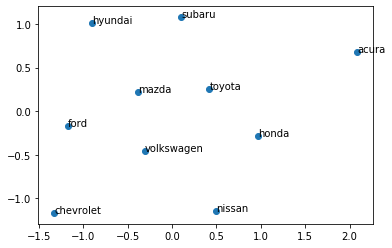

In [21]:
# MDS Plot
import matplotlib.pyplot as plt
plt.scatter(X,Y)
for i, txt in enumerate(lift_adj.index):
    plt.annotate(txt, (X[i], Y[i]))
plt.show()

## TASK B

The creator of the forum asked a simple and general question: "What car is right for me? Help Me Choose!" Because the nature of this question is very general, we expect the analysis of the messages to give us representative understanding of the average carbuyer who uses Edmunds forum.  

Across all the brands, Honda was mentioned the most in the forum. We found that when looking for a new car, participants in the forum tend to look for Asian domestic/import manufacturers. Of the top 10 most mentioned manufacturers, 6 of them are Asian. Brand managers of American and European manufacturers should perform better market researches to attract buyers.  

Looking at the MDS plot, going from left to right, we can create clusters.
   
    Cluster 1: Chevrolet and Ford - Domestic Stable Brands
    Cluster 2: Volkswagen, Mazda, Suburu - Midlevel Import Cars
    Cluster 3: Honda, Toyota, Nissan - Asian domestic/import cars
 
Additionally, the only luxury car brand that made it to the top 10 list is Acura. We understand this is a general forum, so luxury brands will appear less frequently because they have a more specific target consumer. As a result, luxury car manufacturers might not be as attractive to the general consumer. If luxury brands want to capture more of the general market, we suggest adopting a product line expansion strategy. If you look at our MDS plot, Acura is sort of an outlier, and its most sensible competitors are actually Toyota and Honda. Luxury car companies can release more basic models at a lower price point in order to compete with brands like Honda and Toyota. We think this would be a good strategy for Acura for the following reasons: 
1. Acura has already established brand equity as a successful luxury brand, so it should have a relatively easy time converting fencesitters and encouraging brand switching.
2. Because Acura is not an Asian domestic/import manufacturer, Acura will retain significant differentiation from competitors in the general market.
3. Finally, because Acura has an established customer base as a luxury brand, a lower end model for a cheaper price will attract a new customer base without cannibilizing the existing one. 

Volkswagen has high lift values with Mazda and Subaru (2nd and 3rd highest in the entire lift table), both Japanese performance brands. When talking to the brand manager of Volkswagen, we would suggest that they leverage their status as a German car manufacturer to differentiate themselves from the Japanese performance brands. Additionally, as a German brand, Volkswagen can adopt an indirect competitive attack strategy against BMW. BMW is not in the top 10, which implies that within the general market, BMW has lower brand awareness than Volkswagen. BMW and Volkswagen are competitors in the German import market, and Volkswagen can try to undercut BMW on the basis of price and accessibility to grow their share of that market. 


## TASK C

The most frequently mentioned attributes of cars in the forum are "old", "new", "price", "money", "miles", "mileage", "engine", and "reliability". We consolidated the frequencies of "old" and "new" to a new attribute called "age". We consolidated the frequencies of "price" and "money" to a new attribute called "price". We consolidated the frequencies of "miles" and "mileage" to a new attribute called "mileage". After consolidating, the top 5 most frequent attributes of cars are "age", "price", "mileage", "reliability", and "engine". Under the markdown cell titled "Attributes", you can see the corresponding frequencies. 


Below are the brands most associated with the top 5 attributes (see "Attribute Frequency Matrix" for details:

    Age: Honda - 278 messages (Toyota 2nd with 188)
    Price: Honda - 200 messages (Toyota 2nd with 167)
    Mileage: Honda - 180 messages (Toyota 2nd with 170)
    Reliability: Honda - 88 messages (Toyota 2nd with 83)
    Engine: Toyota - 69 messages (Honda 2nd most with 64)



If you take out Honda and Toyota from the analysis, these are the brands most associated with the top 5 attributes (see "Without Honda and Toyota" for details):

    Age: Nissan - 171, Suburu - 142 messages 
    Price: Nissan - 122 messages 
    Mileage: Ford - 89 messages 
    Reliability: Mazda - 88 messages 
    Engine: Chevrolet - 53 messages 


#### Attributes

In [22]:
# Use this to find attributes
words = frequencydf[~frequencydf['Word'].isin(brands)]

#These are our top attributes
attributes = ["age", "price", "mileage", "reliability", "engine"]
basketball = attributes + top10_list
attributes_ = words[words['Word'].isin(attributes)]
attributes_

,Word,Count
1,age,1478
193,price,1003
302,mileage,924
176,reliability,384
878,engine,359


In [23]:
#function for counting number of brands in a comment
def fun(x):
    counter = 0
    for i in range(len(x)):
        if x[i] in basketball:
            counter = counter + 1
        else:
            counter = counter + 0
    return counter
#creating df with only brands
comentionstemp=that[that.map(fun)>=2]
comentionstemp.to_frame().reset_index().drop('index',axis=1)
comentions = comentionstemp.apply(lambda x: [item for item in x if item in basketball])
comentions

0                                   [age, nissan]
3                                   [age, nissan]
8       [honda, toyota, age, nissan, reliability]
12                      [subaru, age, volkswagen]
14                         [age, subaru, mileage]
                          ...                    
4095                    [subaru, toyota, mileage]
4096                 [toyota, reliability, honda]
4097         [reliability, honda, subaru, toyota]
4098                           [age, reliability]
4099                               [age, mileage]
Length: 2295, dtype: object

In [24]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 

 
# Create one list using many lists
data = list(itertools.chain.from_iterable(comentions))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
cooccurance_matrix2 = pd.DataFrame(data_matrix)


#### Attribute Frequency Matrix

In [25]:
attribute_matrix = cooccurance_matrix2 + cooccurance_matrix2.T
og_at_mat = attribute_matrix.idxmax()
og_at_mat
attribute_matrix

,acura,chevrolet,price,honda,nissan,engine,ford,mazda,hyundai,age,mileage,volkswagen,toyota,subaru,reliability
acura,10.0,14.0,58.0,94.0,26.0,22.0,20.0,19.0,10.0,86.0,43.0,15.0,53.0,33.0,21.0
chevrolet,14.0,34.0,79.0,82.0,44.0,48.0,80.0,46.0,27.0,120.0,80.0,18.0,74.0,29.0,21.0
price,58.0,79.0,72.0,200.0,103.0,69.0,56.0,73.0,89.0,299.0,172.0,49.0,167.0,65.0,63.0
honda,94.0,82.0,200.0,80.0,150.0,64.0,81.0,107.0,111.0,278.0,180.0,56.0,304.0,71.0,88.0
nissan,26.0,44.0,103.0,150.0,32.0,29.0,39.0,41.0,69.0,134.0,92.0,43.0,113.0,32.0,41.0
engine,22.0,48.0,69.0,64.0,29.0,8.0,31.0,28.0,31.0,106.0,68.0,19.0,69.0,47.0,27.0
ford,20.0,80.0,56.0,81.0,39.0,31.0,14.0,55.0,50.0,93.0,64.0,27.0,73.0,27.0,40.0
mazda,19.0,46.0,73.0,107.0,41.0,28.0,55.0,32.0,65.0,96.0,43.0,45.0,81.0,60.0,37.0
hyundai,10.0,27.0,89.0,111.0,69.0,31.0,50.0,65.0,34.0,127.0,81.0,31.0,99.0,57.0,31.0
age,86.0,120.0,299.0,278.0,134.0,106.0,93.0,96.0,127.0,154.0,266.0,82.0,188.0,116.0,86.0


In [26]:
basketball2 = attributes + [
 'nissan',
 'hyundai',
 'chevrolet',
 'subaru',
 'ford',
 'mazda',
 'acura',
 'volkswagen']
basketball2

['age',
 'price',
 'mileage',
 'reliability',
 'engine',
 'nissan',
 'hyundai',
 'chevrolet',
 'subaru',
 'ford',
 'mazda',
 'acura',
 'volkswagen']

In [27]:
#function for counting number of brands in a comment
def fun(x):
    counter = 0
    for i in range(len(x)):
        if x[i] in basketball2:
            counter = counter + 1
        else:
            counter = counter + 0
    return counter
#creating df with only brands
comentionstemp=that[that.map(fun)>=2]
comentionstemp.to_frame().reset_index().drop('index',axis=1)
comentions = comentionstemp.apply(lambda x: [item for item in x if item in basketball2])
comentions

0                    [age, nissan]
3                    [age, nissan]
8       [age, nissan, reliability]
12       [subaru, age, volkswagen]
14          [age, subaru, mileage]
                   ...            
4094             [subaru, mileage]
4095             [subaru, mileage]
4097         [reliability, subaru]
4098            [age, reliability]
4099                [age, mileage]
Length: 1962, dtype: object

In [28]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 

 
# Create one list using many lists
data = list(itertools.chain.from_iterable(comentions))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
cooccurance_matrix3 = pd.DataFrame(data_matrix)
top10

,Word,Count
170,honda,1631
171,toyota,1277
6,nissan,778
1079,hyundai,742
898,chevrolet,642
136,subaru,598
1630,ford,583
774,mazda,527
705,acura,450
260,volkswagen,399


#### Without Honda and Toyota

In [29]:
attribute_matrix2 = cooccurance_matrix3 + cooccurance_matrix3.T
og_at_mat2 = attribute_matrix2.idxmax()
attribute_matrix2

,acura,chevrolet,price,nissan,engine,ford,mazda,hyundai,age,mileage,volkswagen,subaru,reliability
acura,10.0,19.0,79.0,34.0,30.0,25.0,23.0,11.0,109.0,57.0,20.0,40.0,31.0
chevrolet,19.0,38.0,88.0,64.0,53.0,90.0,58.0,34.0,131.0,97.0,18.0,33.0,33.0
price,79.0,88.0,86.0,122.0,86.0,74.0,94.0,117.0,361.0,214.0,63.0,78.0,78.0
nissan,34.0,64.0,122.0,46.0,34.0,47.0,58.0,77.0,171.0,122.0,54.0,42.0,55.0
engine,30.0,53.0,86.0,34.0,12.0,41.0,31.0,35.0,127.0,78.0,21.0,51.0,33.0
ford,25.0,90.0,74.0,47.0,41.0,20.0,64.0,65.0,109.0,89.0,33.0,32.0,45.0
mazda,23.0,58.0,94.0,58.0,31.0,64.0,34.0,84.0,117.0,55.0,52.0,70.0,48.0
hyundai,11.0,34.0,117.0,77.0,35.0,65.0,84.0,38.0,154.0,103.0,37.0,72.0,43.0
age,109.0,131.0,361.0,171.0,127.0,109.0,117.0,154.0,178.0,310.0,96.0,142.0,106.0
mileage,57.0,97.0,214.0,122.0,78.0,89.0,55.0,103.0,310.0,60.0,55.0,81.0,84.0


## TASK D

(i) Advice to Product Manager

    Within the midlevel performance import cars cluster (Suburu, Mazda, Volkswagen), Volkwagen has the lowest attribution count for "engine" (21 messages compared to Suburu's 51 and Mazda's 31). Product Managers at Volkswagen and Mazda should put more R&D effort in designing their engines so that they can better compete eith Suburu. 
    Also, Chevy and Ford are direct competitors, and the "Wisdom of the Crowd" tells us that Ford is more closely related with "reliability" than Chevrolet. Chevrolet should invest more resources into the research and development of reliable cars. 
    
(ii) Advice to Marketing/Advertising Manager

    When we speak to the manager at Volkswagen, we can tell them our data reveals that there is unmet demand in the midrage import cars market. Taking Toyota and Honda out of the equation, our attributes analysis reveals that Mazda is the top brand associated with "reliabilty" (48 messages), and Suburu is the second top brand associated with "age" (142 messages). This implies that age and reliability are the most salient attributes in the midlevel import cars cluster. Volkswagen should carve out a niche within its market by presenting an alternative form of reliability. Rather than reliability taking form in old vehicles (i.e. Suburu), Volkswagen can provide an alternative product for carbuyers who want reliability but don't want "hand-me-down suburu". The marketing campaign that Volkswagen launches should reflect the empiral rule of thumb that younger audiences resonate with this tone in advertising.

## TASK E

Honda is the most aspirational brand in terms of people wanting to buy or own. By looking at the word count, we found the most frequent aspirational words. These were words like 'buy', 'buying', 'get', 'getting', 'want', 'value', and 'love'. We then replaced each of these aspirational words with the word "aspiration". We then ran a cooccurance matrix displaying the word "aspiration" and how many times it appeared with each brand. We then converted the aspiration column of the matrix into a data frame. 

Considering the general nature of the forum, the "Wisdom of the Crowd" indicates that Honda is the most aspired brand for the general consumer. Analysts at Honda should compare these results to actual purchase data to see if the "Wisdom of the Crowd" actually translates to real-world purchases. In other words, are people just "talking the talk" or are they also "walking the walk."



#### Markdown

In [30]:
basketball3 = top10_list
basketball3.append('aspiration')
basketball3

['honda',
 'toyota',
 'nissan',
 'hyundai',
 'chevrolet',
 'subaru',
 'ford',
 'mazda',
 'acura',
 'volkswagen',
 'aspiration']

In [31]:
#function for counting number of brands in a comment
def fun(x):
    counter = 0
    for i in range(len(x)):
        if x[i] in basketball3:
            counter = counter + 1
        else:
            counter = counter + 0
    return counter
#creating df with only brands
comentionstemp=that[that.map(fun)>=2]
comentionstemp.to_frame().reset_index().drop('index',axis=1)
comentions = comentionstemp.apply(lambda x: [item for item in x if item in basketball3])
comentions

0                   [aspiration, nissan]
3                   [aspiration, nissan]
8                [honda, toyota, nissan]
10                  [aspiration, subaru]
12      [subaru, aspiration, volkswagen]
                      ...               
4093                     [toyota, mazda]
4094             [subaru, toyota, honda]
4095        [subaru, toyota, aspiration]
4096         [aspiration, toyota, honda]
4097             [honda, subaru, toyota]
Length: 2080, dtype: object

In [32]:
import numpy as np
import nltk
from nltk import bigrams
import itertools
import pandas as pd
 
 
def generate_co_occurrence_matrix(corpus):
    vocab = set(corpus)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
 
    # Create bigrams from all words in corpus
    bi_grams = list(bigrams(corpus))
 
    # Frequency distribution of bigrams ((word1, word2), num_occurrences)
    bigram_freq = nltk.FreqDist(bi_grams).most_common(len(bi_grams))
 
    # Initialise co-occurrence matrix
    # co_occurrence_matrix[current][previous]
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))
 
    # Loop through the bigrams taking the current and previous word,
    # and the number of occurrences of the bigram.
    for bigram in bigram_freq:
        current = bigram[0][1]
        previous = bigram[0][0]
        count = bigram[1]
        pos_current = vocab_index[current]
        pos_previous = vocab_index[previous]
        co_occurrence_matrix[pos_current][pos_previous] = count
    co_occurrence_matrix = np.matrix(co_occurrence_matrix)
 
    # return the matrix and the index
    return co_occurrence_matrix, vocab_index
 

 
# Create one list using many lists
data = list(itertools.chain.from_iterable(comentions))
matrix, vocab_index = generate_co_occurrence_matrix(data)
 
 
data_matrix = pd.DataFrame(matrix, index=vocab_index,
                             columns=vocab_index)
cooccurance_matrix4 = pd.DataFrame(data_matrix)


#### Aspiration Table

In [34]:
aspiration_matrix = cooccurance_matrix4 + cooccurance_matrix4.T
og_at_mat3 = aspiration_matrix.idxmax()
og_at_mat3
aspiration_matrix['aspiration'].to_frame().sort_values(by = "aspiration", ascending = False)

,aspiration
honda,572.0
toyota,462.0
aspiration,356.0
hyundai,263.0
chevrolet,260.0
nissan,251.0
ford,231.0
acura,210.0
mazda,203.0
subaru,201.0
